# Regression Linear / Regression Analysis

![linear Regression](https://files.realpython.com/media/fig-lin-reg.a506035b654a.png)

![](https://files.realpython.com/media/poly-reg.5790f47603d8.png)

In [2]:
# Simple linear regression
# Step 1 Import packages
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Step 2 provide data
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])
print(x)
print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[ 5 20 14 32 22 38]


In [6]:
# Step 3 create a model and fit it
model = LinearRegression().fit(x, y)
model

LinearRegression()

In [7]:
# Step 4 Get result coefficient of dtermination (R2)
r_sq = model.score(x, y)
print(r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

0.715875613747954
intercept: 5.633333333333329
slope: [0.54]


predicted response:
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


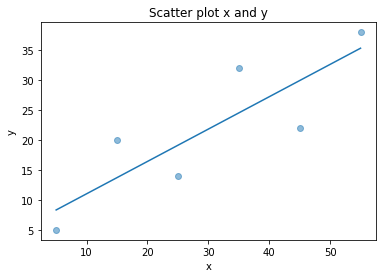

In [8]:
# Step 5 predict response
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')
plt.scatter(x, y, alpha=0.5)
plt.plot(x, y_pred)
plt.title('Scatter plot x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [9]:
# Alternative without predict
y_pred = model.intercept_ + model.coef_ * x # []
print('predicted response:', y_pred, sep='\n')

predicted response:
[[ 8.33333333]
 [13.73333333]
 [19.13333333]
 [24.53333333]
 [29.93333333]
 [35.33333333]]


[[0]
 [1]
 [2]
 [3]
 [4]]
[5.63333333 6.17333333 6.71333333 7.25333333 7.79333333]


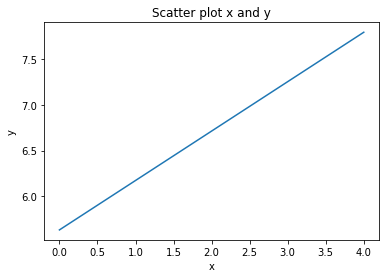

In [15]:
x_new = np.arange(5).reshape((-1, 1))
print(x_new)
y_new = model.predict(x_new)
print(y_new)
# plt.scatter(, y_new, alpha=0.5)
plt.plot(x_new, y_new)
plt.title('plot x new and y new')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [25]:
# Multiple Linnear Regression with scikit
# 2
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)
print(x)
print(y)
# 3
model = LinearRegression().fit(x, y)
# 4
r_sq = model.score(x, y)
print('coefficient of determination', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
# 5 predict response
y_pred = model.predict(x)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]
[ 4  5 20 14 32 22 38 43]
coefficient of determination 0.8615939258756775
intercept: 5.52257927519819
slope: [0.44706965 0.25502548]


[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[15 11  2  8 25 32]


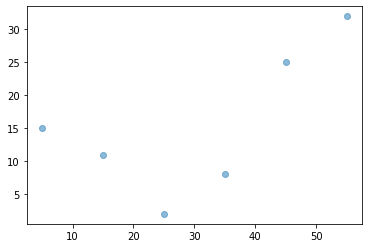

In [26]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])
print(x)
print(y)
plt.scatter(x, y, alpha=0.5)

In [31]:
# step 2
transformer = PolynomialFeatures(degree=2, include_bias=False)
x_ = transformer.fit_transform(x)
print(x_)
# step 3
model = LinearRegression().fit(x_, y)
# step 4
r_sq = model.score(x_, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coefficients:', model.coef_)
y_pred = model.predict(x_)
print('predicted response:', y_pred, sep='\n')

[[   5.   25.]
 [  15.  225.]
 [  25.  625.]
 [  35. 1225.]
 [  45. 2025.]
 [  55. 3025.]]
coefficient of determination: 0.8908516262498564
intercept: 21.372321428571425
coefficients: [-1.32357143  0.02839286]
predicted response:
[15.46428571  7.90714286  6.02857143  9.82857143 19.30714286 34.46428571]


In [32]:
# With bias
x_ = PolynomialFeatures(degree=2, include_bias=True).fit_transform(x)
print(x_)
model = LinearRegression(fit_intercept=False).fit(x_, y)
r_sq = model.score(x_, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coefficients:', model.coef_)
y_pred = model.predict(x_)
print('predicted response:', y_pred, sep='\n')

[[1.000e+00 5.000e+00 2.500e+01]
 [1.000e+00 1.500e+01 2.250e+02]
 [1.000e+00 2.500e+01 6.250e+02]
 [1.000e+00 3.500e+01 1.225e+03]
 [1.000e+00 4.500e+01 2.025e+03]
 [1.000e+00 5.500e+01 3.025e+03]]
coefficient of determination: 0.8908516262498565
intercept: 0.0
coefficients: [21.37232143 -1.32357143  0.02839286]
predicted response:
[15.46428571  7.90714286  6.02857143  9.82857143 19.30714286 34.46428571]


In [35]:
# Advanced Linear Regression with statsmodels
import statsmodels.api as sm 
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)
print(x)
x = sm.add_constant(x)
print(x)
print(y)

model = sm.OLS(y, x)
# help(sm.OLS)
results = model.fit()
print(results.summary())

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]
[[ 1.  0.  1.]
 [ 1.  5.  1.]
 [ 1. 15.  2.]
 [ 1. 25.  5.]
 [ 1. 35. 11.]
 [ 1. 45. 15.]
 [ 1. 55. 34.]
 [ 1. 60. 35.]]
[ 4  5 20 14 32 22 38 43]
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Tue, 20 Apr 2021   Prob (F-statistic):            0.00713
Time:                        21:05:09   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df 

In [38]:
print(results.rsquared)
print(results.rsquared_adj)
print(results.params)

0.8615939258756777
0.8062314962259488
[5.52257928 0.44706965 0.25502548]


In [42]:
# Implement model to real datasets
import statsmodels.api as sm
from sklearn import datasets
import pandas as pd 
data = datasets.load_boston()

In [41]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [66]:
df = pd.DataFrame(data.data, columns=data.feature_names)
target = pd.DataFrame(data.target, columns=['MEDV'])

In [70]:
# step 2
X = df['RM'].values.reshape((-1, 1))
Y = target['MEDV']

# step 3
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              4615.
Date:                Tue, 20 Apr 2021   Prob (F-statistic):                   3.74e-256
Time:                        21:33:13   Log-Likelihood:                         -1747.1
No. Observations:                 506   AIC:                                      3496.
Df Residuals:                     505   BIC:                                      3500.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.6534      0.054     67.930      0.000       3.548       3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

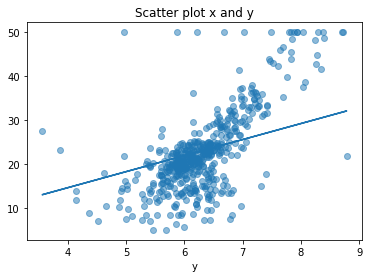

In [49]:

plt.scatter(X, Y, alpha=0.5)
plt.plot(X, predictions)
plt.title('Scatter plot x and y')
plt.xlabel('x')
plt.xlabel('y')
plt.show()

In [68]:
from sklearn import linear_model
data = datasets.load_boston()

df = pd.DataFrame(data.data, columns=data.feature_names)
target = pd.DataFrame(data.target, columns=['MEDV'])

X = df['RM'].values.reshape((-1, 1))
Y = target['MEDV']
model = linear_model.LinearRegression().fit(X, Y)
predictions = model.predict(X)

r_sq = model.score(X, Y)
print('Coefficient of determination:', r_sq) # why 0.48
plt.scatter(X, Y, alpha=0.5)
plt.plot(X, predictions)
plt.show()

[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]
 [6.43 ]
 [6.012]
 [6.172]
 [5.631]
 [6.004]
 [6.377]
 [6.009]
 [5.889]
 [5.949]
 [6.096]
 [5.834]
 [5.935]
 [5.99 ]
 [5.456]
 [5.727]
 [5.57 ]
 [5.965]
 [6.142]
 [5.813]
 [5.924]
 [5.599]
 [5.813]
 [6.047]
 [6.495]
 [6.674]
 [5.713]
 [6.072]
 [5.95 ]
 [5.701]
 [6.096]
 [5.933]
 [5.841]
 [5.85 ]
 [5.966]
 [6.595]
 [7.024]
 [6.77 ]
 [6.169]
 [6.211]
 [6.069]
 [5.682]
 [5.786]
 [6.03 ]
 [5.399]
 [5.602]
 [5.963]
 [6.115]
 [6.511]
 [5.998]
 [5.888]
 [7.249]
 [6.383]
 [6.816]
 [6.145]
 [5.927]
 [5.741]
 [5.966]
 [6.456]
 [6.762]
 [7.104]
 [6.29 ]
 [5.787]
 [5.878]
 [5.594]
 [5.885]
 [6.417]
 [5.961]
 [6.065]
 [6.245]
 [6.273]
 [6.286]
 [6.279]
 [6.14 ]
 [6.232]
 [5.874]
 [6.727]
 [6.619]
 [6.302]
 [6.167]
 [6.389]
 [6.63 ]
 [6.015]
 [6.121]
 [7.007]
 [7.079]
 [6.417]
 [6.405]
 [6.442]
 [6.211]
 [6.249]
 [6.625]
 [6.163]
 [8.069]
 [7.82 ]
 [7.416]
 [6.727]
 [6.781]
 [6.405]
 [6.137]
 [6.167]
 [5.851]
 [5.836]
 [6.127]
 [6.474]
 [6.229]
 [6.195]
 

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://github.com/dhyan6/data-science-projects/blob/main/kc_house_data.csv?raw=true' 
houses = pd.read_csv(url)
print(houses.head())


      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
0  221900.0         3       1.00         1180      5650     1.0          3   
1  538000.0         3       2.25         2570      7242     2.0          3   
2  180000.0         2       1.00          770     10000     1.0          3   
3  604000.0         4       3.00         1960      5000     1.0          5   
4  510000.0         3       2.00         1680      8080     1.0          3   

   grade  sqft_above  sqft_basement  zipcode  
0      7        1180              0    98178  
1      7        2170            400    98125  
2      6         770              0    98028  
3      7        1050            910    98136  
4      8        1680              0    98074  


In [89]:
correlations = houses.corr()

# sns.heatmap(correlations, annot=True)
help(houses.corr)

Help on method corr in module pandas.core.frame:

corr(method='pearson', min_periods=1) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Compute pairwise correlation of columns, excluding NA/null values.
    
    Parameters
    ----------
    method : {'pearson', 'kendall', 'spearman'} or callable
        Method of correlation:
    
        * pearson : standard correlation coefficient
        * kendall : Kendall Tau correlation coefficient
        * spearman : Spearman rank correlation
        * callable: callable with input two 1d ndarrays
            and returning a float. Note that the returned matrix from corr
            will have 1 along the diagonals and will be symmetric
            regardless of the callable's behavior.
    
            .. versionadded:: 0.24.0
    
    min_periods : int, optional
        Minimum number of observations required per pair of columns
        to have a valid result. Currently only available for Pearson
        and Spearman correla

<AxesSubplot:title={'center':'House price vs Squared Feet'}, xlabel='Squared Feet', ylabel='House Price (in millions)'>

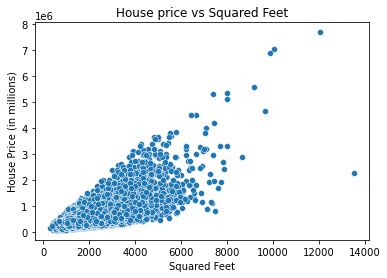

In [74]:
plt.title('House price vs Squared Feet')
plt.xlabel('Squared Feet')
plt.ylabel('House Price (in millions)')
sns.scatterplot(x='sqft_living', y='price', data=houses)

In [81]:
from sklearn.model_selection import train_test_split
X = houses[['sqft_living']]
Y = houses['price']
# X.info()
x_train, x_test, y_train, y_test = train_test_split(X, Y)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16209 entries, 1334 to 11642
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   sqft_living  16209 non-null  int64
dtypes: int64(1)
memory usage: 253.3 KB


0.49451239349643794
-43830.09564121661
[280.39233218]


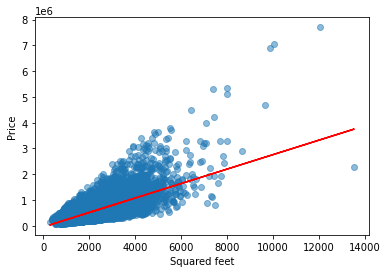

In [86]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
model = lr.fit(x_train, y_train)
r_sq = model.score(x_train, y_train)
print(r_sq)
print(model.intercept_)
print(model.coef_)
predictions = model.predict(x_train)

plt.scatter(x_train, y_train, alpha=0.5)
plt.plot(x_train, predictions, 'red')
plt.xlabel('Squared feet')
plt.ylabel('Price')
plt.show()

In [88]:
model.predict([[5000]])

array([1358131.56527806])